In [1]:
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('Datasets_Healthy_Older_People/Combine.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency,Label
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1


In [4]:
#Report = ProfileReport(df)
#Report.to_widgets()

In [5]:
#Report.to_file('Report.html')

In [6]:
df_new = df.drop_duplicates()
df_new

,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency,Label
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
...,...,...,...,...,...,...,...,...,...
75123,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,2
75124,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,2
75125,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,4
75126,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,4


In [7]:
df_new.isnull().sum()

Time                     0
Acceleration_frontal     0
Acceleration_vertical    0
Acceleration_lateral     0
Antenna                  0
RSSI                     0
Phase                    0
Frequency                0
Label                    0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

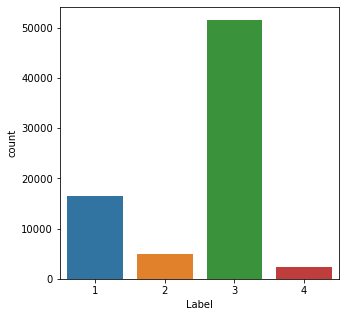

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='Label',data=df_new)

<AxesSubplot:xlabel='Antenna', ylabel='count'>

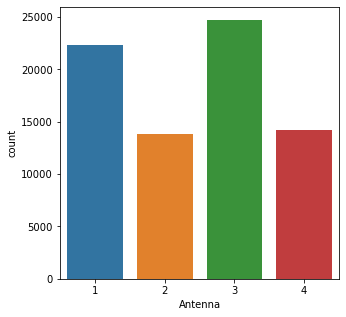

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='Antenna',data=df_new)

In [10]:
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)

IQR = q3-q1

((df_new < (q1-1.5*IQR)) | (df_new > (q3+1.5*IQR))).sum()

Time                      2638
Acceleration_frontal         0
Acceleration_vertical        0
Acceleration_lateral     18796
Antenna                      0
RSSI                       502
Phase                        0
Frequency                    0
Label                        0
dtype: int64

In [11]:
columns = ['Time', 'Acceleration_lateral', 'RSSI']
for i in columns:
    q75,q25 = np.percentile(df_new[i],[75,25])
    iqr = q75 - q25
    minimum = q25 - 1.5 * iqr
    maximum = q75 + 1.5 * iqr
    df_new.loc[df_new[i] < minimum, i] = minimum
    df_new.loc[df_new[i] > maximum, i] = maximum

In [12]:
((df_new < (q1-1.5*IQR)) | (df_new > (q3+1.5*IQR))).sum()

Time                     0
Acceleration_frontal     0
Acceleration_vertical    0
Acceleration_lateral     0
Antenna                  0
RSSI                     0
Phase                    0
Frequency                0
Label                    0
dtype: int64

In [13]:
df_new.skew()

Time                     0.853516
Acceleration_frontal    -0.072713
Acceleration_vertical    0.481109
Acceleration_lateral    -0.488363
Antenna                 -0.013201
RSSI                     0.198131
Phase                    0.013867
Frequency                0.230136
Label                   -0.960660
dtype: float64

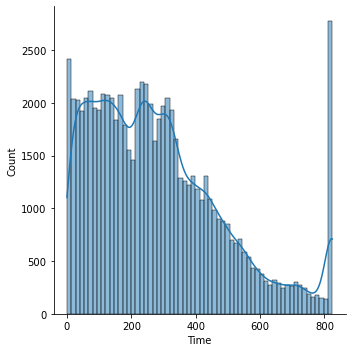

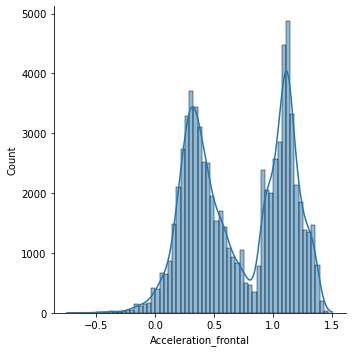

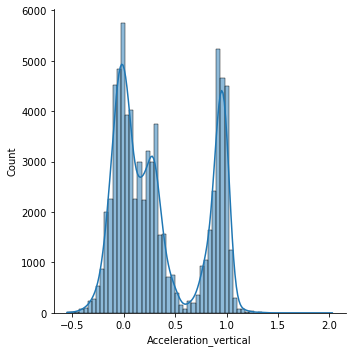

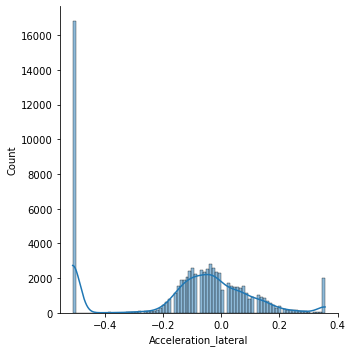

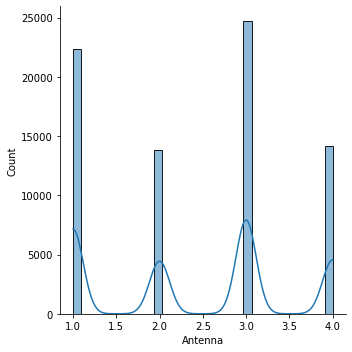

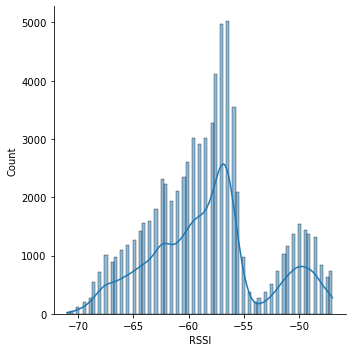

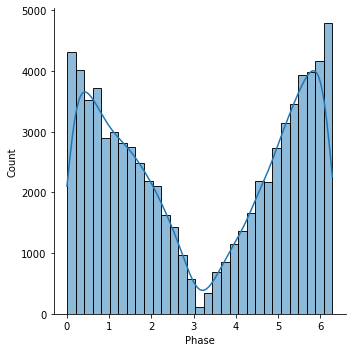

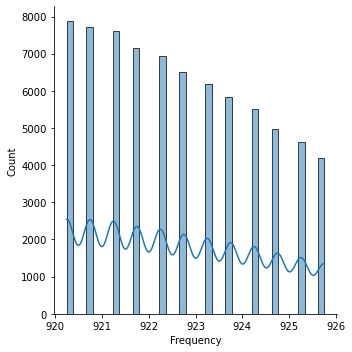

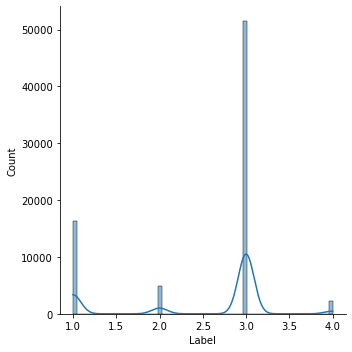

In [14]:
for i in df_new.columns:
    sns.displot(data=df_new,x=i,kde=True)

In [15]:
df_new['Label'].value_counts()

3    51518
1    16406
2     4911
4     2291
Name: Label, dtype: int64

In [16]:
scaling_feature = [feature for feature in df_new.columns if feature not in ['Label']]
df_new[scaling_feature].head()

,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25


In [17]:
scaler = StandardScaler()
scaler.fit(df_new[scaling_feature])

StandardScaler()

In [18]:
scaler.transform(df_new[scaling_feature])

array([[-1.37911471, -1.09295873,  1.58216986, ..., -1.01300863,
        -0.33546178,  0.94064667],
       [-1.3767015 , -1.09295873,  1.58216986, ..., -0.91580122,
         0.72385252, -0.54825241],
       [-1.37187509, -0.65823897,  1.36300402, ..., -1.01300863,
        -0.05781393,  0.64286685],
       ...,
       [ 0.80001362, -0.71619995,  1.36300402, ...,  1.02834681,
         1.17233238, -0.2504726 ],
       [ 0.80039973, -0.71619995,  1.36300402, ...,  1.22276161,
         1.25600707, -0.2504726 ],
       [ 0.80363343, -0.31044833,  1.25337337, ..., -0.33255681,
         1.16669602,  1.83398611]])

In [19]:
df2 = pd.DataFrame(scaler.transform(df_new[scaling_feature]),columns=df_new[scaling_feature].columns)
df2.head()

,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency
0,-1.379115,-1.092959,1.582170,0.168314,-1.278914,-1.013009,-0.335462,0.940647
1,-1.376702,-1.092959,1.582170,0.168314,-1.278914,-0.915801,0.723853,-0.548252
2,-1.371875,-0.658239,1.363004,0.457582,-1.278914,-1.013009,-0.057814,0.642867
3,-1.370668,-0.658239,1.363004,0.457582,-1.278914,-0.915801,-0.513305,-0.846032
4,-1.367049,-0.919076,1.472611,0.264737,-1.278914,-1.013009,1.253166,-1.441592


In [20]:
data = pd.concat([df_new[['Label']].reset_index(drop=True), df2],axis=1)
data.head()

,Label,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency
0,1,-1.379115,-1.092959,1.582170,0.168314,-1.278914,-1.013009,-0.335462,0.940647
1,1,-1.376702,-1.092959,1.582170,0.168314,-1.278914,-0.915801,0.723853,-0.548252
2,1,-1.371875,-0.658239,1.363004,0.457582,-1.278914,-1.013009,-0.057814,0.642867
3,1,-1.370668,-0.658239,1.363004,0.457582,-1.278914,-0.915801,-0.513305,-0.846032
4,1,-1.367049,-0.919076,1.472611,0.264737,-1.278914,-1.013009,1.253166,-1.441592


In [21]:
data.isnull().sum()

Label                    0
Time                     0
Acceleration_frontal     0
Acceleration_vertical    0
Acceleration_lateral     0
Antenna                  0
RSSI                     0
Phase                    0
Frequency                0
dtype: int64

In [22]:
file = 'Scaler.pkl'

pickle.dump(scaler,open(file,'wb'))

In [23]:
data.to_csv('Datasets_Healthy_Older_People/Final_data.csv')